In [214]:
#making standerd route
import json
import random

# Read the JSON file
with open('city.json', 'r') as file:
    data = json.load(file)

# Extract city names
cities = [item['city'] for item in data]

merchandise = ['apple', 'tomatoes', 'butter', 'water', 'milk', 'pens', 'honey']

routes = []

for i in range(1000):
    route = {}
    route['id'] = i
    
    # Generate a list of non-repeating random cities
    city_sample = random.sample(cities, 3)
    
    # Randomly generate the number of merchandise
    num_merchandise = random.randint(1, 50)
    
    # Randomly select merchandise types
    merchandise_sample = random.sample(merchandise, random.randint(2, 5))
    
    # Build the route dictionary format
    route['route'] = []
    for j in range(2):
        route_info = {}
        route_info['from'] = city_sample[j]
        route_info['to'] = city_sample[j+1]
        
        # Generate random merchandise quantities for each route
        merchandise_dict = {}
        for m in merchandise_sample:
            merchandise_dict[m] = random.randint(1, num_merchandise)
        
        route_info['merchandise'] = merchandise_dict
        
        route['route'].append(route_info)
    
    routes.append(route)

# Write the route list to a JSON file without corrupt records
valid_routes = [r for r in routes if 'route' in r and len(r['route']) == 2]
with open('routes.json', 'w') as file:
    json.dump(routes, file, indent=4)

In [197]:
routes

[{'id': 0,
  'route': [{'from': 'Haren',
    'to': 'Strijen',
    'merchandise': {'apple': 1,
     'honey': 12,
     'milk': 18,
     'tomatoes': 7,
     'pens': 6}},
   {'from': 'Strijen',
    'to': 'Weert',
    'merchandise': {'apple': 9,
     'honey': 13,
     'milk': 1,
     'tomatoes': 7,
     'pens': 4}}]},
 {'id': 1,
  'route': [{'from': 'Wageningen',
    'to': 'Lelystad',
    'merchandise': {'butter': 10, 'apple': 7, 'water': 7, 'honey': 7}},
   {'from': 'Lelystad',
    'to': 'Julianadorp',
    'merchandise': {'butter': 9, 'apple': 14, 'water': 18, 'honey': 12}}]},
 {'id': 2,
  'route': [{'from': 'Heemstede',
    'to': 'Nijverdal',
    'merchandise': {'pens': 20, 'milk': 4, 'water': 21, 'honey': 3}},
   {'from': 'Nijverdal',
    'to': 'Meerssen',
    'merchandise': {'pens': 13, 'milk': 5, 'water': 19, 'honey': 12}}]},
 {'id': 3,
  'route': [{'from': 'Sluis',
    'to': 'Tilburg',
    'merchandise': {'butter': 33, 'honey': 4, 'pens': 40, 'water': 7}},
   {'from': 'Tilburg',
    '

In [198]:
# making actual route

import json
import random
import copy

# Read the JSON file
with open('city.json', 'r') as file:
    data = json.load(file)

# Extract city names
cities = [item['city'] for item in data]

# Define merchandise types
merchandise_types = ['apple', 'tomatoes', 'butter', 'water', 'milk', 'pens', 'honey']

with open('routes.json', 'r') as file:
    routes = json.load(file)

act_routes = []

for route in routes:
    if len(route['route']) < 2:
        continue  # Skip routes with less than two cities

    for _ in range(10):
        act_route = copy.deepcopy(route)  # Use deepcopy to avoid modifying the original route

        # Randomly select a city to modify
        modified_city_index = random.randint(0, len(act_route['route']) - 1)
        modified_city = act_route['route'][modified_city_index]

        # Randomly decide whether to modify city
        if random.choice([True, False]):
            # Modify the selected city
            new_city = random.choice(cities)
            modified_city['from'] = new_city

            # If the modified city is the second city, modify it throughout the route
            if modified_city_index == 1:
                # Replace the modified city with a new city
                act_route['route'][modified_city_index]['from'] = new_city
                # Connect the cities before and after the replaced city
                act_route['route'][modified_city_index - 1]['to'] = new_city
                if modified_city_index + 1 < len(act_route['route']):
                    act_route['route'][modified_city_index]['to'] = act_route['route'][modified_city_index + 1]['from']

        # Randomly modify merchandise
        for city_route in act_route['route']:
            # Select random merchandise types
            selected_merchandise = random.sample(merchandise_types, random.randint(1, len(merchandise_types)))
            # Assign random quantities to selected merchandise
            city_route['merchandise'] = {item: random.randint(1, 20) for item in selected_merchandise}

        act_routes.append(act_route)

# Write the act routes list to a new JSON file
with open('act_routes.json', 'w') as file:
    json.dump(act_routes, file, indent=4)


In [199]:
act_routes

[{'id': 0,
  'route': [{'from': 'Haren',
    'to': 'Eerbeek',
    'merchandise': {'butter': 7, 'apple': 17, 'milk': 7}},
   {'from': 'Eerbeek',
    'to': 'Weert',
    'merchandise': {'pens': 19, 'butter': 10}}]},
 {'id': 0,
  'route': [{'from': 'Haren',
    'to': 'Strijen',
    'merchandise': {'tomatoes': 8,
     'apple': 10,
     'milk': 4,
     'honey': 4,
     'pens': 10}},
   {'from': 'Strijen',
    'to': 'Weert',
    'merchandise': {'butter': 6,
     'apple': 6,
     'tomatoes': 4,
     'milk': 19,
     'pens': 4,
     'water': 5,
     'honey': 17}}]},
 {'id': 0,
  'route': [{'from': 'Barneveld',
    'to': 'Strijen',
    'merchandise': {'honey': 13,
     'tomatoes': 3,
     'pens': 20,
     'water': 1,
     'apple': 6,
     'milk': 13,
     'butter': 11}},
   {'from': 'Strijen',
    'to': 'Weert',
    'merchandise': {'apple': 20,
     'pens': 9,
     'honey': 4,
     'water': 2,
     'milk': 11}}]},
 {'id': 0,
  'route': [{'from': 'Haren',
    'to': 'Strijen',
    'merchandise': {

In [200]:
routes

[{'id': 0,
  'route': [{'from': 'Haren',
    'to': 'Strijen',
    'merchandise': {'apple': 1,
     'honey': 12,
     'milk': 18,
     'tomatoes': 7,
     'pens': 6}},
   {'from': 'Strijen',
    'to': 'Weert',
    'merchandise': {'apple': 9,
     'honey': 13,
     'milk': 1,
     'tomatoes': 7,
     'pens': 4}}]},
 {'id': 1,
  'route': [{'from': 'Wageningen',
    'to': 'Lelystad',
    'merchandise': {'butter': 10, 'apple': 7, 'water': 7, 'honey': 7}},
   {'from': 'Lelystad',
    'to': 'Julianadorp',
    'merchandise': {'butter': 9, 'apple': 14, 'water': 18, 'honey': 12}}]},
 {'id': 2,
  'route': [{'from': 'Heemstede',
    'to': 'Nijverdal',
    'merchandise': {'pens': 20, 'milk': 4, 'water': 21, 'honey': 3}},
   {'from': 'Nijverdal',
    'to': 'Meerssen',
    'merchandise': {'pens': 13, 'milk': 5, 'water': 19, 'honey': 12}}]},
 {'id': 3,
  'route': [{'from': 'Sluis',
    'to': 'Tilburg',
    'merchandise': {'butter': 33, 'honey': 4, 'pens': 40, 'water': 7}},
   {'from': 'Tilburg',
    '

In [201]:
#Levenshtein distance calculation
import json
from Levenshtein import distance


def calculate_similarity(route1, route2):
    lev_distance = distance(route1, route2)
    max_length = max(len(route1), len(route2))
    similarity = 1 - lev_distance / max_length
    return similarity


def calculate_merchandise_similarity(merch1, merch2):
    lev_distance = distance(merch1, merch2)
    max_length = max(len(merch1), len(merch2))
    similarity = 1 - lev_distance / max_length
    return similarity


with open('routes.json', 'r') as file:
    routes = json.load(file)

with open('act_routes.json', 'r') as file:
    act_routes = json.load(file)

standard_route = routes[0]['route']
standard_route_str = ' '.join([f"{route['from']} {route['to']}" for route in standard_route])

for act_route in act_routes:
    act_route_str = ' '.join([f"{act_route_route['from']} {act_route_route['to']}" for act_route_route in act_route['route']])
    route_similarity = calculate_similarity(standard_route_str, act_route_str)

    merchandise_similarity = 0
    for i, route in enumerate(standard_route):
        standard_merchandise = route['merchandise']
        act_merchandise = act_route['route'][i]['merchandise']
        merchandise_similarity += calculate_merchandise_similarity(str(standard_merchandise), str(act_merchandise))
    merchandise_similarity /= len(standard_route)

    total_similarity = (route_similarity + merchandise_similarity) / 2

    route_id = act_route['id']
    print(f"Similarity for route {route_id}: {total_similarity}")



Similarity for route 0: 0.4866658132787165
Similarity for route 0: 0.7757936507936508
Similarity for route 0: 0.6456093189964157
Similarity for route 0: 0.7233742959549412
Similarity for route 0: 0.5680572787427627
Similarity for route 0: 0.6871479774705581
Similarity for route 0: 0.7313748079877112
Similarity for route 0: 0.6724270353302612
Similarity for route 0: 0.44841269841269843
Similarity for route 0: 0.8125763125763126
Similarity for route 1: 0.28336385836385836
Similarity for route 1: 0.28785202252944186
Similarity for route 1: 0.3398966624773076
Similarity for route 1: 0.367032967032967
Similarity for route 1: 0.2587301587301587
Similarity for route 1: 0.2597542242703533
Similarity for route 1: 0.35289987789987787
Similarity for route 1: 0.3606379731379732
Similarity for route 1: 0.31601382488479257
Similarity for route 1: 0.3863247863247863
Similarity for route 2: 0.28209947946790054
Similarity for route 2: 0.34826986821893446
Similarity for route 2: 0.2566488961175868
Simil

In [202]:
#payment adding
import json
from Levenshtein import distance

# Read the JSON file for standard route
with open('routes.json', 'r') as file:
    standard_routes = json.load(file)

# Read the JSON file for actual routes
with open('act_routes.json', 'r') as file:
    act_routes = json.load(file)

# Define constants
BONUS_AMOUNT = 1000
ROUTE_AMOUNT = 250
MERCHANDISE_RATE = 2

# Calculate payment for each driver in actual routes
for act_route in act_routes:
    # Calculate route similarity using Levenshtein distance
    standard_route_str = ' '.join([f"{route['from']} {route['to']}" for route in standard_routes[0]['route']])
    act_route_str = ' '.join([f"{route['from']} {route['to']}" for route in act_route['route']])
    route_similarity = 1 - (distance(standard_route_str, act_route_str) / max(len(standard_route_str), len(act_route_str)))

    # Calculate payment components
    lev_distance = distance(standard_route_str, act_route_str)
    route_amount = len(act_route['route']) * ROUTE_AMOUNT
    merchandise_amount = sum([quantity for route in act_route['route'] for quantity in route['merchandise'].values()]) * MERCHANDISE_RATE

    # Calculate total payment and round to two decimal places FORMULA
    total_payment = round((BONUS_AMOUNT * route_similarity) + route_amount + merchandise_amount, 2)

    # Assign payment to the driver in the actual route
    act_route['payment'] = total_payment

# Write the updated act_routes list with payment to a new JSON file
with open('act_routes_with_payment.json', 'w') as file:
    json.dump(act_routes, file, indent=4)


In [203]:
act_routes

[{'id': 0,
  'route': [{'from': 'Haren',
    'to': 'Eerbeek',
    'merchandise': {'butter': 7, 'apple': 17, 'milk': 7}},
   {'from': 'Eerbeek',
    'to': 'Weert',
    'merchandise': {'pens': 19, 'butter': 10}}],
  'payment': 1249.63},
 {'id': 0,
  'route': [{'from': 'Haren',
    'to': 'Strijen',
    'merchandise': {'tomatoes': 8,
     'apple': 10,
     'milk': 4,
     'honey': 4,
     'pens': 10}},
   {'from': 'Strijen',
    'to': 'Weert',
    'merchandise': {'butter': 6,
     'apple': 6,
     'tomatoes': 4,
     'milk': 19,
     'pens': 4,
     'water': 5,
     'honey': 17}}],
  'payment': 1694.0},
 {'id': 0,
  'route': [{'from': 'Barneveld',
    'to': 'Strijen',
    'merchandise': {'honey': 13,
     'tomatoes': 3,
     'pens': 20,
     'water': 1,
     'apple': 6,
     'milk': 13,
     'butter': 11}},
   {'from': 'Strijen',
    'to': 'Weert',
    'merchandise': {'apple': 20,
     'pens': 9,
     'honey': 4,
     'water': 2,
     'milk': 11}}],
  'payment': 1532.45},
 {'id': 0,
  'rou

In [215]:
#wokring method 1 FOR BANKING
import json
from Levenshtein import distance

# Define constants
BONUS_AMOUNT = 1000
ROUTE_AMOUNT = 250
MERCHANDISE_RATE = 2
BANK_ACCOUNT_LIMIT = 500000
FINE_PERCENTAGE = 0.05

# Calculate route similarity using Levenshtein distance
def calculate_similarity(route1, route2):
    lev_distance = distance(route1, route2)
    max_length = max(len(route1), len(route2))
    similarity = 1 - lev_distance / max_length
    return similarity

# Calculate payment for each driver in actual routes
def calculate_payment(act_routes):
    total_payment = 0
    for act_route in act_routes:
        standard_route_str = ' '.join([f"{route['from']} {route['to']}" for route in standard_routes[0]['route']])
        act_route_str = ' '.join([f"{route['from']} {route['to']}" for route in act_route['route']])
        route_similarity = calculate_similarity(standard_route_str, act_route_str)

        lev_distance = distance(standard_route_str, act_route_str)
        route_amount = len(act_route['route']) * ROUTE_AMOUNT
        merchandise_amount = sum([quantity for route in act_route['route'] for quantity in route['merchandise'].values()]) * MERCHANDISE_RATE

        act_route['payment'] = (route_similarity * BONUS_AMOUNT) + route_amount + merchandise_amount
        total_payment += act_route['payment']

    return total_payment

# Optimize payment scheme
def optimize_payment(act_routes):
    deposit_back_amount = []
    fine_amount = 0
    payment_history = []

    while act_routes:
        withdrawn_amount = BANK_ACCOUNT_LIMIT
        payment_amount = 0
        paid_routes = []

        for act_route in act_routes:
            if payment_amount + act_route['payment'] <= withdrawn_amount:
                payment_amount += act_route['payment']
                paid_routes.append(act_route)

        deposit_back = withdrawn_amount - payment_amount
        deposit_back_amount.append(deposit_back)
        fine = deposit_back * FINE_PERCENTAGE
        fine_amount += fine
        payment_history.append(paid_routes)

        act_routes = [route for route in act_routes if route not in paid_routes]

    return deposit_back_amount, fine_amount, payment_history

# Calculate total payment amount
total_payment = calculate_payment(act_routes)

# Sort the actual routes based on payment in descending order
act_routes.sort(key=lambda x: x['payment'], reverse=True)

# Optimize payment scheme and get deposit back amounts, fine amount, and payment history
deposit_back_amount, fine_amount, payment_history = optimize_payment(act_routes)

print(f"Total payment amount: ${total_payment:.2f}")
print(f"Total deposit back amount: ${sum(deposit_back_amount):.2f}")
print(f"Total fine amount: ${fine_amount:.2f}")


Total payment amount: $9095427.52
Total deposit back amount: $404572.48
Total fine amount: $20228.62


In [217]:
# Print deposit back amounts and payment history
print("Deposit back amounts:")
for index, amount in enumerate(deposit_back_amount):
    fine = amount * FINE_PERCENTAGE
    print(f"Deposit {index + 1}: ${amount:.2f} (Fine: ${fine:.2f})")

print("\nPayment history:")
for index, payments in enumerate(payment_history):
    print(f"Deposit {index + 1} payment routes:")
    for route in payments:
        print(f"Route ID: {route['id']}")


Deposit back amounts:
Deposit 1: $21.97 (Fine: $1.10)
Deposit 2: $89.46 (Fine: $4.47)
Deposit 3: $0.16 (Fine: $0.01)
Deposit 4: $0.09 (Fine: $0.00)
Deposit 5: $0.02 (Fine: $0.00)
Deposit 6: $261.05 (Fine: $13.05)
Deposit 7: $0.11 (Fine: $0.01)
Deposit 8: $174.83 (Fine: $8.74)
Deposit 9: $287.54 (Fine: $14.38)
Deposit 10: $0.34 (Fine: $0.02)
Deposit 11: $513.88 (Fine: $25.69)
Deposit 12: $0.04 (Fine: $0.00)
Deposit 13: $0.03 (Fine: $0.00)
Deposit 14: $0.10 (Fine: $0.00)
Deposit 15: $0.06 (Fine: $0.00)
Deposit 16: $298.76 (Fine: $14.94)
Deposit 17: $259.72 (Fine: $12.99)
Deposit 18: $236.57 (Fine: $11.83)
Deposit 19: $402427.75 (Fine: $20121.39)

Payment history:
Deposit 1 payment routes:
Route ID: 0
Route ID: 0
Route ID: 0
Route ID: 0
Route ID: 0
Route ID: 0
Route ID: 0
Route ID: 488
Route ID: 717
Route ID: 296
Route ID: 296
Route ID: 243
Route ID: 814
Route ID: 717
Route ID: 717
Route ID: 14
Route ID: 479
Route ID: 369
Route ID: 296
Route ID: 480
Route ID: 421
Route ID: 648
Route ID: 7

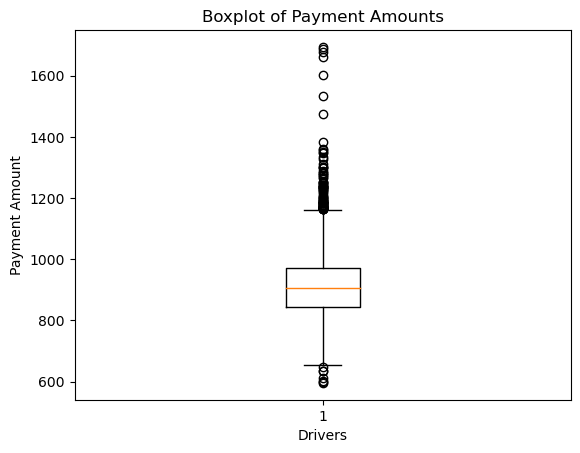

In [206]:
import json
import matplotlib.pyplot as plt

# Read the JSON file with act_routes and payments
with open('act_routes_with_payment.json', 'r') as file:
    act_routes = json.load(file)

# Extract the payment amounts
payments = [route['payment'] for route in act_routes]

# Create a boxplot
plt.boxplot(payments)

# Add labels and title
plt.xlabel('Drivers')
plt.ylabel('Payment Amount')
plt.title('Boxplot of Payment Amounts')

# Display the plot
plt.show()


In [207]:
import json

# Read the JSON file with act_routes and payments
with open('act_routes_with_payment.json', 'r') as file:
    act_routes = json.load(file)

# Calculate the sum of all payments
total_payment = sum(route['payment'] for route in act_routes)

print(f"Total payment amount: ${total_payment:.2f}")

Total payment amount: $9095426.74


In [212]:
unique_ids = set()

for act_route in act_routes:
    route_id = act_route['id']
    unique_ids.add(route_id)

num_ids = len(unique_ids)
print(f"Total number of unique IDs in actual routes: {num_ids}")



Total number of unique IDs in actual routes: 1000


In [213]:
num_ids = len(act_routes)
print(f"Total number of IDs in actual routes: {num_ids}")

Total number of IDs in actual routes: 10000
